In [6]:
import wandb
from tqdm import tqdm

# Authenticate
wandb.login()

# Initialize API
api = wandb.Api()

# Retrieve runs
runs = api.runs("jamesli-wks-johns-hopkins-university/SAGE_GCN_hyperparameter_tuning_JULY_24")

# Extract parameters and metrics
data = []
for run in tqdm(runs):
    summary = run.summary._json_dict
    config = {k: v for k, v in run.config.items() if not k[0] == "_"}
    config.update(summary)
    data.append(config)

# Convert to DataFrame for easier manipulation
import pandas as pd
df = pd.DataFrame(data)
df = df[[col for col in df.columns if not col.startswith('_')]]

100%|██████████| 10368/10368 [00:35<00:00, 294.85it/s]


In [16]:
df = df[['hidden_dim', 'model_type', 'num_epochs', 'trace_type', 'sample_rate',
       'dataset_name', 'weight_decay', 'learning_rate', 'exclusion_type','activation_type', 'num_hidden_layers','test_acc']]

In [27]:
dataset_name_ls = ['CoraGraphDataset', 'CiteseerGraphDataset', 'PubmedGraphDataset']
target_sample_rate = 0.7
rst_df = pd.DataFrame()
for dataset_name in dataset_name_ls:
    sub_df = df[(df['dataset_name'] == dataset_name) & (df['sample_rate'] == target_sample_rate)]
    sub_df = sub_df.sort_values(by='test_acc', ascending=False)
    rst_df = pd.concat([rst_df, sub_df.head(5)])
with open("top5_hyper_param_no_restriction.csv", "w") as f:
    f.write(rst_df.to_csv(index=False))

In [33]:
dataset_name_ls = ['CoraGraphDataset', 'CiteseerGraphDataset', 'PubmedGraphDataset']
target_sample_rate = 0.7
trace_type_ls = ['Laplacian', 'Feature']
exclusion_type_ls = ['Smallest', 'Largest']
for trace_type in trace_type_ls:
    for exclusion_type in exclusion_type_ls:
        rst_df = pd.DataFrame()
        for dataset_name in dataset_name_ls:
            sub_df = df[(df['dataset_name'] == dataset_name) & (df['sample_rate'] == target_sample_rate) & (df['trace_type'] == trace_type) & (df['exclusion_type'] == exclusion_type)]
            sub_df = sub_df.sort_values(by='test_acc', ascending=False)
            rst_df = pd.concat([rst_df, sub_df.head(5)])
        with open(f"top5_hyper_param_{trace_type}_{exclusion_type}.csv", "w") as f:
            f.write(rst_df.to_csv(index=False))

In [35]:
from torch_geometric.datasets import OGB_MAG

# Load the dataset
dataset = OGB_MAG(root='../data/')

# Access the data
data = dataset[0]  # The dataset contains only one graph

# Print basic information
print(f"Number of nodes: {data.num_nodes}")
print(f"Number of edges: {data.num_edges}")
print(f"Number of node types: {len(data.node_types)}")
print(f"Number of edge types: {len(data.edge_types)}")

Extracting ../data/mag/raw/mag.zip
Processing...
Done!


Number of nodes: 1939743
Number of edges: 21111007
Number of node types: 4
Number of edge types: 4


In [40]:
paper_nodes = data['paper']

In [50]:
data['author', 'writes', 'paper'].edge_index

tensor([[      0,       0,       0,  ..., 1134647, 1134648, 1134648],
        [  19703,  289285,  311768,  ...,  657395,  671118,  719594]])

In [56]:
data['paper', 'cites', 'paper'].edge_index

tensor([[     0,      0,      0,  ..., 736388, 736388, 736388],
        [    88,  27449, 121051,  ..., 421711, 427339, 439864]])

In [61]:
data['author'].num_nodes

1134649

In [4]:
import torch

output = torch.zeros(4, 5, dtype=torch.int64)
src = torch.tensor([[1, 2, 3], [4, 5, 6]])
index = torch.tensor([[0, 1, 2], [2, 3, 4]])
print(output.dtype, src.dtype, index.dtype)
output.scatter_add_(1, index, src)
print(output)

torch.int64 torch.int64 torch.int64
tensor([[1, 2, 3, 0, 0],
        [0, 0, 4, 5, 6],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0]])


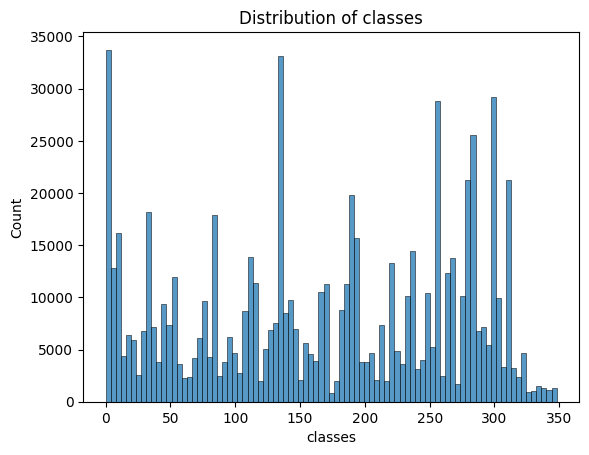

In [4]:
import sys
sys.path.append('../')
from utils import *
import torch
import seaborn as sns
import matplotlib.pyplot as plt

OGB_MAG = load_ogbn_mag()
y = OGB_MAG.y
sns.histplot(y)
plt.xlabel("classes")
plt.title("Distribution of classes")
plt.savefig("../img/ogbn_class_distribution.png")

In [1]:
import torch
from torch_geometric.datasets import Planetoid
from torch_geometric.loader import NeighborLoader

dataset = Planetoid(root='../data/', name='Cora')
loader = NeighborLoader(dataset[0], num_neighbors=[-1], batch_size=32, shuffle=True)

for batch in loader:
    print(batch)
    break

Data(x=[148, 1433], edge_index=[2, 127], y=[148], train_mask=[148], val_mask=[148], test_mask=[148], n_id=[148], e_id=[127], input_id=[32], batch_size=32)


/home/jamesl/anaconda3/envs/pytorch/lib/python3.11/site-packages/torch_geometric/sampler/neighbor_sampler.py:60: UserWarning: Using 'NeighborSampler' without a 'pyg-lib' installation is deprecated and will be removed soon. Please install 'pyg-lib' for accelerated neighborhood sampling
  warnings.warn(f"Using '{self.__class__.__name__}' without a "


In [4]:
dataset[0]

Data(x=[2708, 1433], edge_index=[2, 10556], y=[2708], train_mask=[2708], val_mask=[2708], test_mask=[2708])

In [3]:
batch

Data(x=[148, 1433], edge_index=[2, 127], y=[148], train_mask=[148], val_mask=[148], test_mask=[148], n_id=[148], e_id=[127], input_id=[32], batch_size=32)